# Cardiac Signals DS Pipeline Example Run
The following script runs through the bulk of the data science pipeline.
However, since autoencoder training can take up to 15 minutes, the script defaults to loading a pretrained model and creating the reconstruction from that model. 

If you want to train the model yourself, uncomment the bottom cell to train the autoencoder directly from the preprocessed data

### IMPORTANT
To use the pretrained model, download `ae_patient_16_dim100_model.h5` into the `Working_Data` directory. The file can be found at the following box link: https://rice.box.com/s/95nzzti2ao9e0blrrrc8iwo3g2c258z3

### Required Preliminary Step: Make the virtual Environment and start it

Example installation of a virtual environment and installing project requirements:\
`pip install virtualenv`\
`virtualenv venv`\
`source venv/bin/activate`\
`pip install -r requirements.txt`\
`python -m ipykernel install --user --name=venv`\
In the jupyter notebook, go to Kernel, change kernel, and select the venv.

In [1]:
# Perform peak detection and filtering on the raw ECG leads
# Saves out a series of files, including Fixed_Dim_HBs_Idx16.npy
from src.preprocessing.heartbeat_split import preprocess_sum
preprocess_sum("Reference_idx_16_Time_block_1.h5", 16, beats_per_datapoint = 10)

Opening file : Reference_idx_16_Time_block_1.h5


In [2]:
# Normalizes the heartbeat vectors for the autoencoder
from src.preprocessing.normalize_heartbeats import normalize_heartbeats
normalize_heartbeats()

Normalized patient 16


In [3]:
# Loads the pretrained model and generate (and save) the reconstructions of the normalized heartbeats
from src.models.conv_denoising_ae import load_model
load_model(16)

In [4]:
from src.models.changepoint import cusum

calculating mse for file index 16 on the reconstructed cdae model
original normalized signal


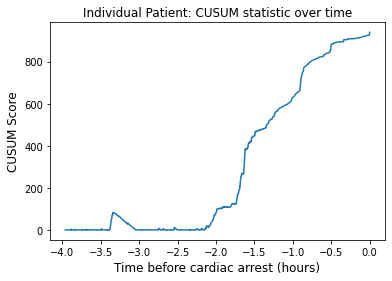

In [5]:
# compute the mean squared error of the reconstruction vs original heartbeats and apply the CUSUM changepoint algorithm
cusum_signal = cusum(16, "cdae", 100)

The previous graph is the CUSUM error metric in the four hours preceding the cardiac arrest for patient 16

## Training autoencoder and generate intermediate data

In [6]:
# Uncomment the following section if you want to train the autoencoder rather than loading the pretrained model
# Warning: Training takes 15 minutes, so pretrained model is offered for execution speed

# from src.models.conv_denoising_ae import training_ae
# # Trains the autoencoder over patient 16's normalized heartbeat and generates the heartbeat reconstruction
# training_ae(110, 100, 16, False)

Epoch 1/110
7/7 [==============================] - 3s 427ms/step - loss: 1.0536
Epoch 2/110
7/7 [==============================] - 3s 423ms/step - loss: 0.7855
Epoch 3/110
7/7 [==============================] - 3s 415ms/step - loss: 0.6410
Epoch 4/110
7/7 [==============================] - 3s 458ms/step - loss: 0.5263
Epoch 5/110
7/7 [==============================] - 3s 421ms/step - loss: 0.4460
Epoch 6/110
7/7 [==============================] - 3s 420ms/step - loss: 0.4049
Epoch 7/110
7/7 [==============================] - 3s 416ms/step - loss: 0.3882
Epoch 8/110
7/7 [==============================] - 3s 423ms/step - loss: 0.3781
Epoch 9/110
7/7 [==============================] - 3s 445ms/step - loss: 0.3710
Epoch 10/110
7/7 [==============================] - 3s 450ms/step - loss: 0.3662
Epoch 11/110
7/7 [==============================] - 3s 421ms/step - loss: 0.3611
Epoch 12/110
7/7 [==============================] - 3s 431ms/step - loss: 0.3556
Epoch 13/110
7/7 [===================